# <u>**Transformada Discreta de Fourier**</u>

A transformada discreta de Fourier associa uma onda, dada no domínio de tempo e representada por um conjunto discreto de pontos

$$(t_0, f_0), (t_1, f_1), ..., (t_{N-1}, f_{N-1})$$

a uma representação dessa onda no domínio de frequências e fases.

<br>

<center><img src="https://github.com/guerinileonardo/figures/blob/main/tfd2.png?raw=true" width="800"></center>

<br>

Assumindo que as coordenadas de tempo $t_0, t_1,...,t_{N-1}$ são uniformemente espaçados, a transformada de Fourier discreta pode ser escrita como

$$
F_k=\sum_{n=0}^{N-1} f_n e^{\frac{-2i \pi k n}{N}} \quad \text { para } k=0,...,N-1
$$

e a transformada inversa de Fourier como

$$
f_n=\frac{1}{N} \sum_{k=0}^{N-1} F_k e^{\frac{-2i \pi k n}{N}} \quad \text { para } n=0,...,N-1,
$$

onde:

* $N$ é o número total de amostras;
* $n$ é o índice da amostra;
* $f_n$ é o valor do sinal em $t_n$;
* $k$ é o índice de frequência, com $ k=0,1,...,N-1;$
* $F_k$ está associado à amplitude e à fase da frequência $k$.

<br><br>

Vamos definir a transformada discreta de Fourier computacionalmente:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
def fourier_disc(fn):
    '''
    Retorna a transformada discreta de Fourier associada à função
    discretizada por fn.
    '''
    N = len(fn)                                 # tamanho do vetor (número de amostras)
    Fk = np.zeros(N, dtype=np.complex128)       # inicializa o vetor da transformada de Fourier
    for k in range(N):                          # percorre cada frequência k da transformada
        for n in range(N):                      # soma sobre todos os pontos da função no domínio do tempo
            Fk[k] += fn[n]* np.exp((-2j*np.pi*k*n)/N) # fórmula da DFT
    return Fk

Usando a **Fórmula de Euler**

$$ e^{ \pm i a}=\cos (a) \pm i \sin (a), $$

podemos escrever a transformada discreta de Fourier (dadas anteriormente) na forma trigonométrica como

$$
F_k=\frac{1}{N} \sum_{n=0}^N\left[f_n \cos \left(k \omega_0 n\right)-i f_n \sin\left(k \omega_0 n\right)\right].
$$

e

$$
f_n=\sum_{k=0}^{N-1}\left[F_k \cos \left(k \omega_0 n\right)-i F_k \sin\left(k \omega_0 n\right)\right].
$$

Aqui, o fator de escala $1/N$ foi inserido na equação da transformada e não na da inversa.

<br>

Observe que $F_k$ é um número complexo que codifica as informações de amplitude e fase de um componente senoidal complexo $e^{i2\pi kn/N}$ associado ao valor de $f_n$.

<br>

A amplitude e a fase do sinal podem ser calculadas como

$$Amp = \frac{|F_k|}{N}= \frac{\sqrt{Re(F_k)^2 + Im(F_k)^2}}{N},$$

$$\phi = \arctan \bigg( \frac{Im(F_k)}{Re(F_k)}\bigg).$$

<br>

***

## **Exemplo 1**

Vejamos como obter informações da soma de três sinais a partir da tranformada discreta de Fourier.

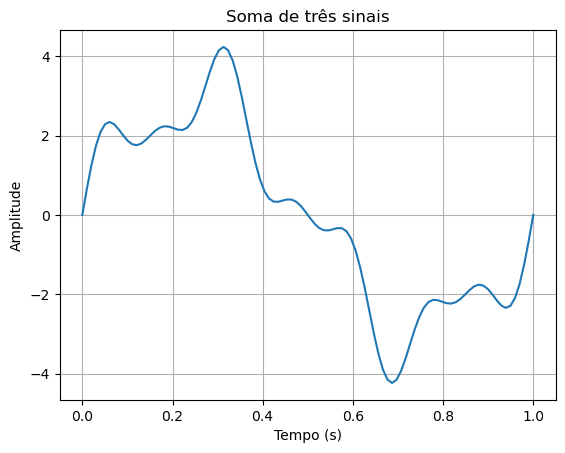

In [13]:
# define a função
sinal = lambda A, w, t: A*np.sin(2*np.pi*w*t)  # sinal(amplitude, frequência, intervalo)

# eixo do tempo discretizado
tn = np.linspace(0, 1, 100)

# cria um sinal composto de 3 senoidais
fn = sinal(3, 1, tn) + sinal(1, 4, tn) + sinal(0.5, 7, tn)

plt.plot(tn, fn)
plt.xlabel('Tempo (s)')
plt .ylabel('Amplitude')
plt.title('Soma de três sinais')
plt.grid()
plt.show()

Note que, por construção, o espectro de amplitudes desse sinal é formado pelas amplitudes $3, 1, 0.5$, associadas às frequências $1, 4, 7$, respectivamente.

<br>

Vejamos como obter essas informações aplicando a transformada de Fourier discreta à discretização do sinal dada pela variável `fn`.

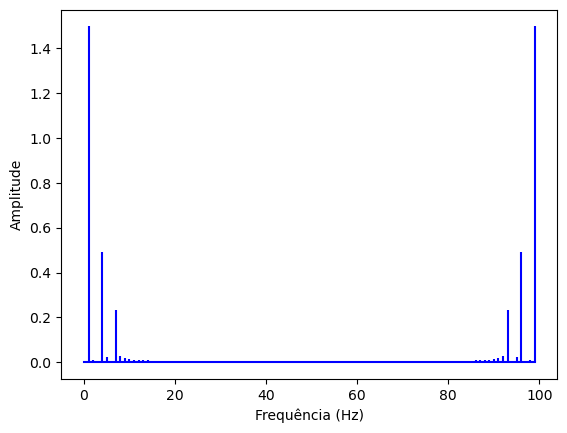

In [ ]:
# número de amostras de do sinal fn
N = len(fn)

# calcula a tranformada discreta
Fk = fourier_disc(fn)

# vetor das frequências
freq = np.arange(len(Fk))
 
# amplitudes normalizada
amp = abs(Fk) / N

# cria um gráfico de linhas
# 'b' indica a cor azul, sem marcadores nos pontos ('markerfmt=" "') e com uma linha de base azul ('basefmt="-b"')
plt.stem(freq, amp, 'b', markerfmt=" ", basefmt="-b")

plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.show()

<br>

Pela forma como a transformada de Fourier é definida, as frequências retornadas aparecem sempre de forma simétrica. Para o caso em que o sinal recebido é uma **função real**, as informações de interesse estarão na primeira metade dessas frequências.

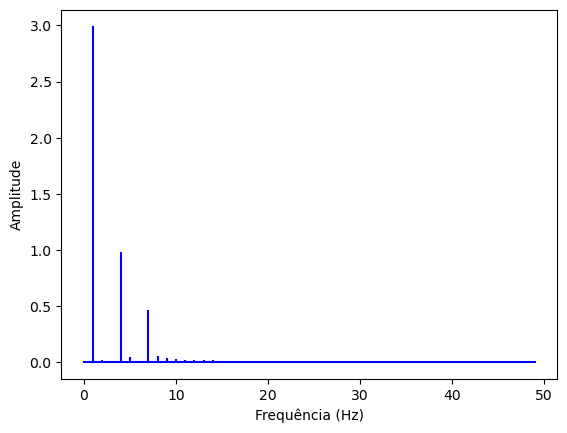

In [15]:
# como a TDF de um sinal real é simétrica, basta exibir até N/2 para representar todas as informações únicas do espectro
N2 = int(N/2)

plt.stem(freq[:N2], abs(Fk[:N2])/N2, 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.show()

Aqui, verificamos que as frequências mais destacadas $1, 4, 7$ são de fato as que foram utilizadas na construção do sinal, associadas às suas respectivas amplitudes.

<br>

<u>**Pergunta:**</u> Por que também aparecem outras frequências, associadas a amplitudes menores?

<br>

***
<br>

# **<u>Transformada Rápida de Fourier</u>**

Embora o algoritmo descrito no exemplo anterior calcule adequadamente a TDF, ele requer $N^2$ operações. Consequentemente, mesmo para amostras de dados de tamanho moderado, a determinação direta da TFD pode gastar muito tempo.

<br>

A **transformada rápida de Fourier** (ou FFT) é um algoritmo que foi desenvolvido para calcular a TFD de uma forma extremamente eficiente. Sua velocidade vem do fato de que ela utiliza os resultados dos cálculos anteriores para reduzir o número de operações. Em particular, ela explora a periodicidade e a simetria das funções trigonométricas para calcular a transformada com aproximadamente $N \log(2 N)$ operações.

<br>

Logo, para N = 50 amostras, a FFT é da ordem de 10 vezes mais rápida do que a TFD padrão. Para N = 1000, é cerca de 100 vezes mais rápida.

<br><br>

O módulo `numpy.fft` inclui um conjunto básico de rotinas para transformada de Fourier discreta, enquanto o módulo `scipy.fft`contém um conjunto mais abrangente.

A função `fft`calcula a Transformada de Fourier discreta para $n$ pontos amostrais. A função `rfft` retorna a primeira metade dos dados transformados, omitindo a parte simétrica. As funções `fftfreq` e `rfftfreq` retornam as frequências das amostras e a metade das frequências, respectivamente.

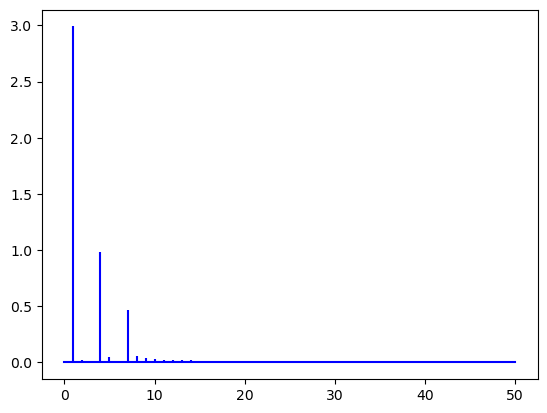

In [16]:
from numpy.fft import rfft, rfftfreq

N = len(fn)
N2 = N/2

Fk = rfft(fn) # faz o cálculo do código anterior
freq = rfftfreq(N, 1/N) # retorna as frequências

plt.stem(freq, abs(Fk) / (N2),'b', markerfmt=" ", basefmt="-b")
plt.show()

<br>

Aplicando a transformada inversa:

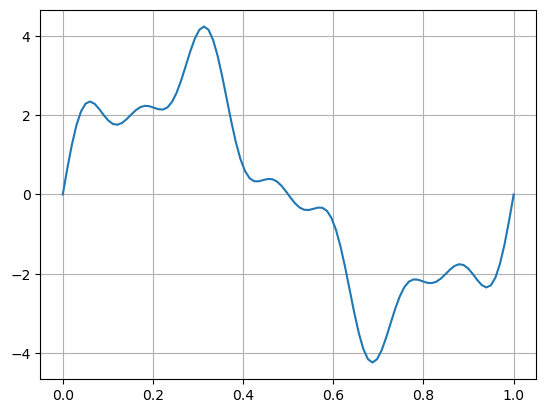

In [17]:
from scipy.fft import irfft

fn = irfft(Fk) # transformada inversa da FFT

plt.plot(tn, fn)
plt.grid()
plt.show()

<br>

***
<br>

# <u>**Removendo frequências indesejadas**</u>

Para lidar com sinais ruidosos, podemos verificar seu espectro de amplitudes e remover as frequências associadas a amplitudes pequenas.

<br>

## **Exemplo 2**

Começamos criando um sinal simples com uma única função senoidal.

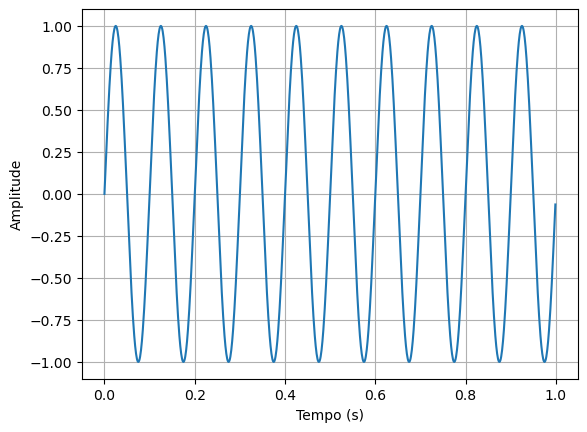

In [18]:
t = np.arange(0, 1, 0.001)        # gera um array de valores t, com começo em 0, fim em 1 e passo 0.001
s = sinal(1, 10, t)               # cria um sinal de amplitude A = 1 e frequência w = 10

plt.plot(t, s)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

<br>

De fato, podemos verificar que seu diagrama de amplitudes é trivial.

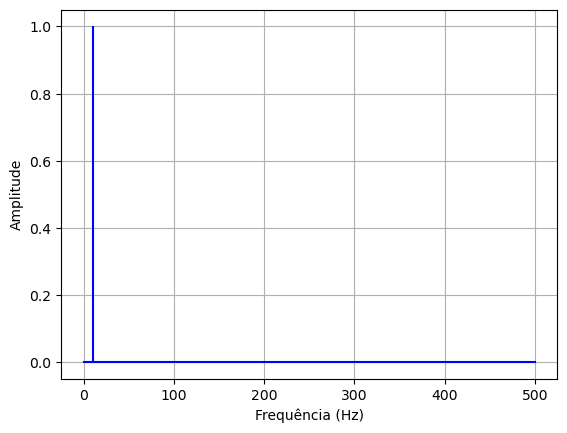

In [19]:
N = len(s)
dt = 1/len(s)

# aplica a transformada rápida
F = rfft(s)

# pega o módulo e normaliza
amps = np.abs(F) / (N/2)
freqs = rfftfreq(N, dt)

# plota
plt.stem(freqs, amps,'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

Vamos agora introduzir artificialmente um ruído a esse sinal.

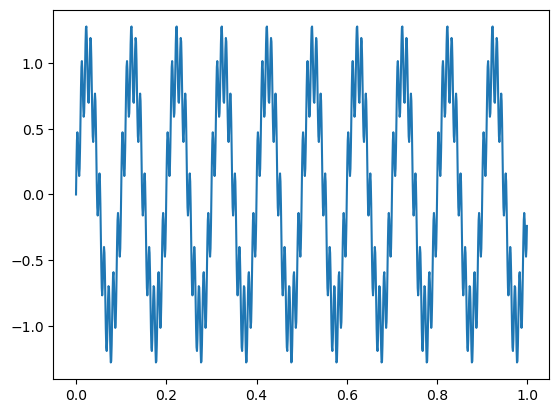

In [20]:
# criando um ruido
r = sinal(0.3, 100, t)

# criando um sinal ruidoso
sr = s + r

plt.plot(t, sr)
plt.show()

<br>

Assim, o sinal ruidoso possui o seguinte diagrama de amplitudes:

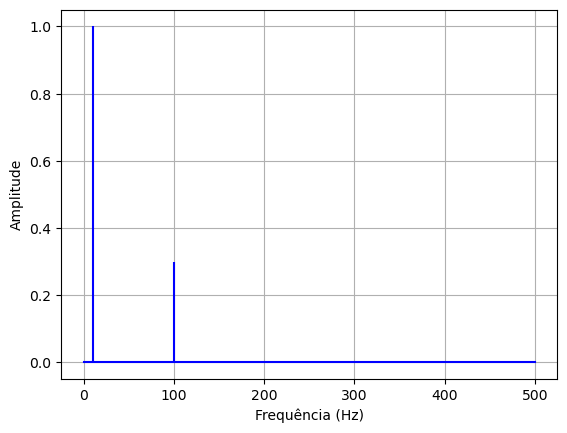

In [21]:
# aplicando a transformada rápida
Fr = rfft(sr)

# tomando o módulo e normalizando
amps = np.abs(Fr) / (N/2)
freqs = rfftfreq(N, dt)

# plotando
plt.stem(freqs, amps, 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

<br>

Ou seja, ao verificarmos que a frequência $w=100$ possui uma amplitude substancialmente menor que a frequência $w=10$, o identificamos como ruído.

Assim, podemos manualmente deletá-lo do diagrama de amplitudes e reconstruir o sinal sem esse ruído.

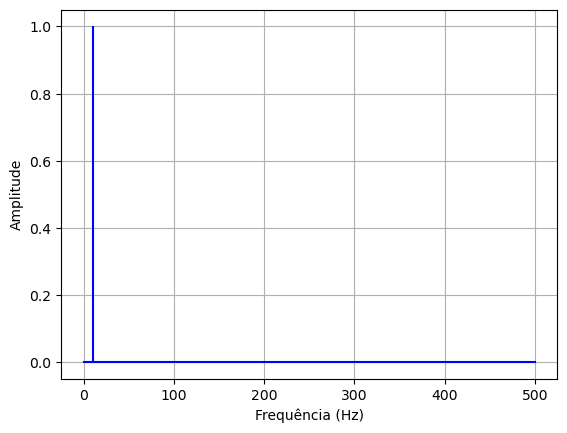

In [22]:
# zerando a amplitude na frequência 100
Fr[100] = 0
amps = np.abs(Fr) / (N/2)

plt.stem(freqs, amps,'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

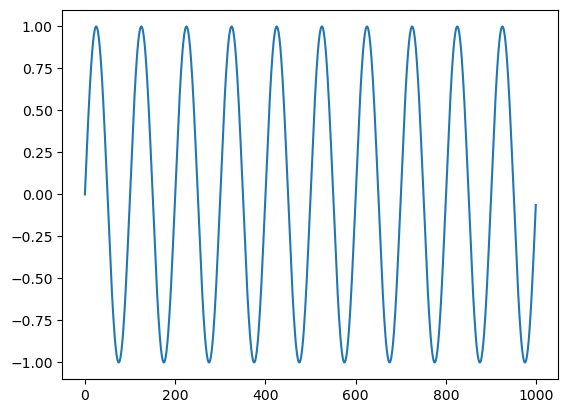

In [23]:
# aplicando a inversa
sf = irfft(Fr)

plt.plot(sf)
plt.show()

<br>

***
<br>

### **Exemplo 3**

Considere o sinal abaixo, ao qual adicionamos um ruído aleatório.

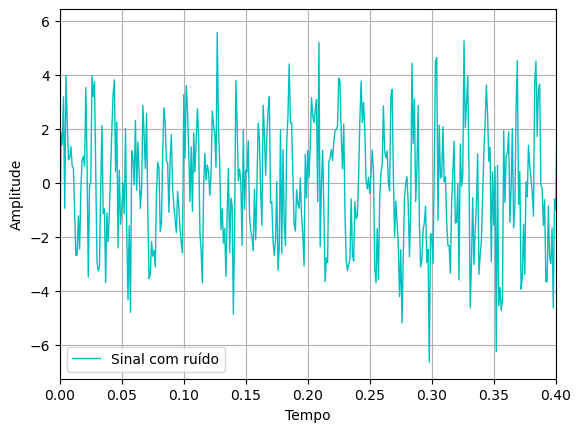

In [24]:
# discretizando o tempo
dt = 0.001
t = np.arange(0, 1, dt)

# criando um sinal
s = sinal(2, 50, t) + sinal(1, 120, t)

# inserindo um ruido aleatório
sr = s + 1.5 * np.random.randn(len(t))

# plotando
plt.plot(t, sr, color='c', linewidth=1, label='Sinal com ruído')
plt.xlim(0, 0.4)
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

<br>

Aplicando a transformada de Fourier e obtendo o espectro de amplitudes:

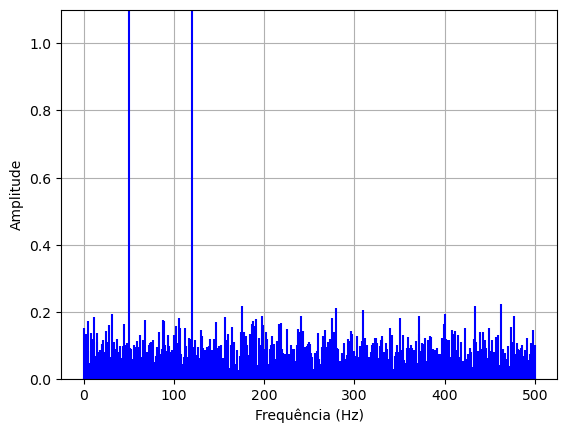

In [25]:
# aplicando a transformada rápida
Fr = rfft(sr)

# tomando o módulo e normalizando
amps = np.abs(Fr/(N/2))
freqs = rfftfreq(N, dt)

# plotando
plt.stem(freqs, amps,'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.ylim(0, 1.1)
plt.grid()

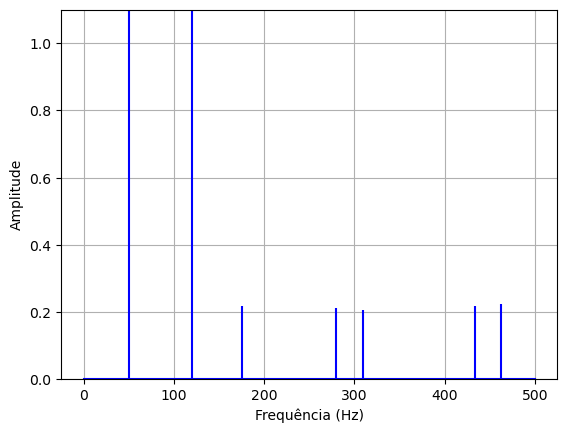

In [26]:
# removendo frequencias de amplitude < 0.2 (limiar)
amps_idxs = amps < 0.2
Fr[amps_idxs] = 0
amps = np.abs(Fr/(N/2))

fig, ax = plt.subplots()
ax.stem(freqs, amps, 'b', markerfmt=" ", basefmt="-b")
ax.set_xlabel('Frequência (Hz)')
ax.set_ylabel('Amplitude')
ax.set_ylim(0,1.1)
ax.grid()

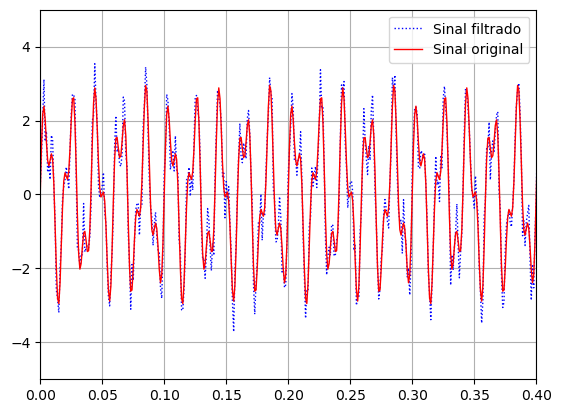

In [27]:
# obtendo o sinal filtrado com a inversa
sf = irfft(Fr)

plt.plot(t, sf, 'b:', lw=1, label='Sinal filtrado')
plt.plot(t, s, 'r', lw=1, label='Sinal original')
plt.xlim(0, 0.4)
plt.ylim(-5, 5)
plt.legend()
plt.grid()
plt.show()

<br>

***
<br>

## <u>**Lendo dados em arquivo externo**</u>

<br>

[Neste site](https://www.eia.gov/electricity/gridmonitor/dashboard/electric_overview/US48/US48), é possível obter dados sobre a demanda de energia elétrica nos Estados Unidos e baixá-los em formato .csv.

Podemos então carregar esses dados com os comandos abaixo, após buscar o arquivo na pasta 'Downloads'.

Como exemplo, você pode baixar o arquivo `930-data-export.csv` disponível no moodle e carregá-lo aqui.

In [2]:
# from google.colab import files
# uploaded = files.upload()

<br>

Para ler esses dados, usamos então a biblioteca Pandas.

In [5]:
import pandas as pd

df = pd.read_csv("930-data-export.csv", delimiter=',', parse_dates=[1])

print(df)

c:\Users\vitor\anaconda3\Lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\vitor\AppData\Local\Temp\ipykernel_14548\3758729442.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("930-data-export.csv", delimiter=',', parse_dates=[1])


    Region Code Timestamp (Hour Ending)  Demand (MWh)  Demand Forecast (MWh)  \
0          US48     2024-04-18 00:00:00     428383.16               422856.3   
1          US48     2024-04-18 01:00:00     407992.27               398790.2   
2          US48     2024-04-18 02:00:00     390665.37               381172.6   
3          US48     2024-04-18 03:00:00     376783.20               366555.1   
4          US48     2024-04-18 04:00:00     367888.49               362506.1   
..          ...                     ...           ...                    ...   
188        US48     2024-04-25 20:00:00           NaN               450242.3   
189        US48     2024-04-25 21:00:00           NaN               449311.7   
190        US48     2024-04-25 22:00:00           NaN               441753.4   
191        US48     2024-04-25 23:00:00           NaN               426796.9   
192        US48     2024-04-26 00:00:00           NaN               407701.8   

     Net Generation (MWh)  Total Interc

<br>

Plotando os dados em forma de gráfico:

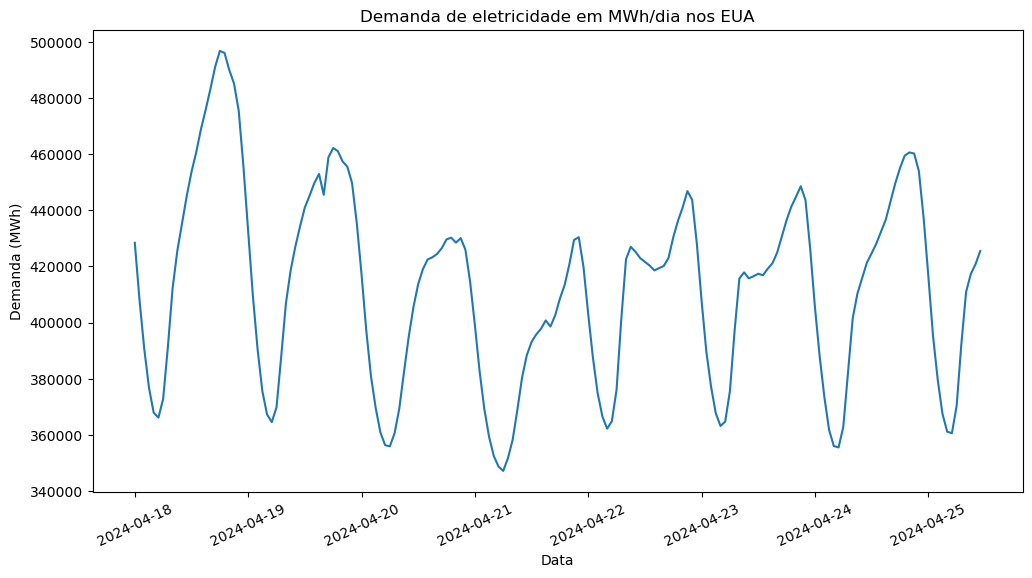

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# mudando os nomes das colunas, na formatação de variável df
df.rename(columns={'Timestamp (Hour Ending)':'hora', 'Demand (MWh)':'demanda'},
          inplace=True)

# plotando os dados
plt.figure(figsize = (12, 6))
plt.plot(df['hora'][:180], df['demanda'][:180])       # pegamos apenas os 180 primeiros dados pois os últimos em geral estão faltando (NaN)
plt.xlabel('Data')
plt.ylabel('Demanda (MWh)')
plt.xticks(rotation=25)
plt.title('Demanda de eletricidade em MWh/dia nos EUA')
plt.show()

<br>

***
<br>

## **Exercício 1**

Aplique a transformada discreta de Fourier para o sinal mostrado acima, identifique as frequências ruidosas e obtenha um sinal filtrado.

In [66]:
# coluna de demanda de energia
demanda = df['demanda'][:180]

N = len(demanda)
Fr = rfft(demanda[:180])
dt = 1 # considerando que os dados estão em horas

# frequências
freqs = rfftfreq(N, dt)

# aplicação da FFT
Fr = rfft(demanda)

# amplitudes normalizadas
amps = np.abs(Fr / (N/2))

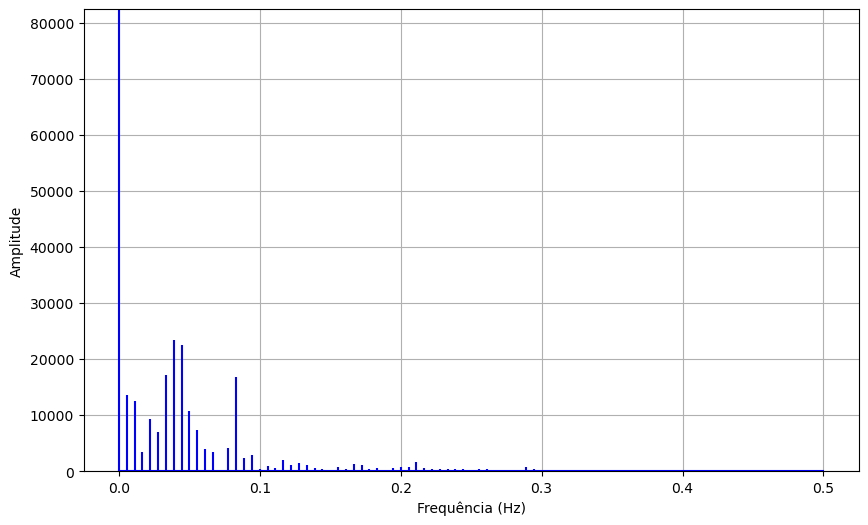

In [67]:
# plot
plt.figure(figsize=(10,6))
plt.stem(freqs, amps, 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.ylim(0, max(amps)*0.1) # alteração da escala
plt.grid()
plt.show()

In [81]:
# maiores amplitudes
sorted_amps = np.sort(amps)[::-1]
print(sorted_amps[:10])  # Maiores 10 amplitudes

[824007.76255556  23339.15892442  22577.29312864  17135.04509329
  16890.7264697   13506.61871149  12570.46876215  10808.22450662
   9292.63354122   7416.5650028 ]


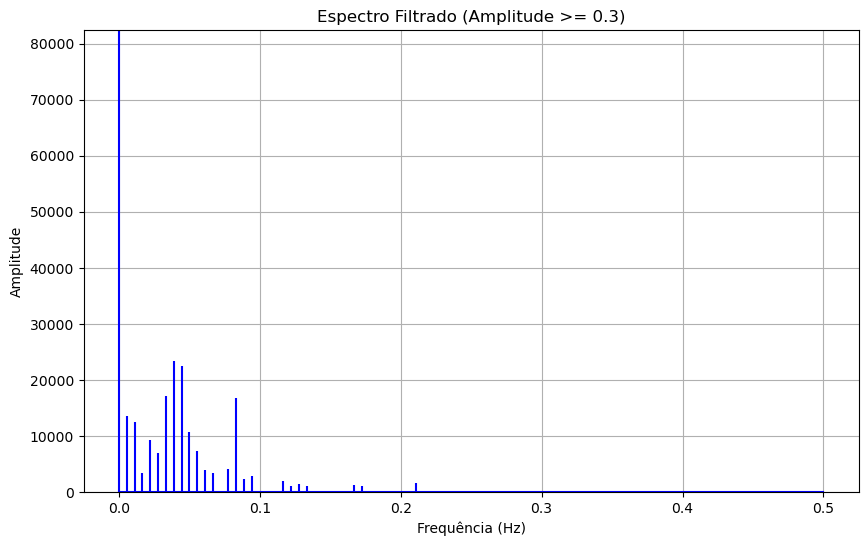

In [ ]:
# removendo frequências com menos de 1000MWh
limiar = 1000
mask = amps < limiar
Fr_filtrado = Fr.copy()
Fr_filtrado[mask] = 0

# Novo espectro após filtragem
amps_filtrado = np.abs(Fr_filtrado / (N/2))

plt.figure(figsize=(10,6))
plt.stem(freqs, amps_filtrado, 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.title('Espectro Filtrado (Amplitude >= 0.3)')
plt.ylim(0, max(amps)*0.1)
plt.grid()
plt.show()

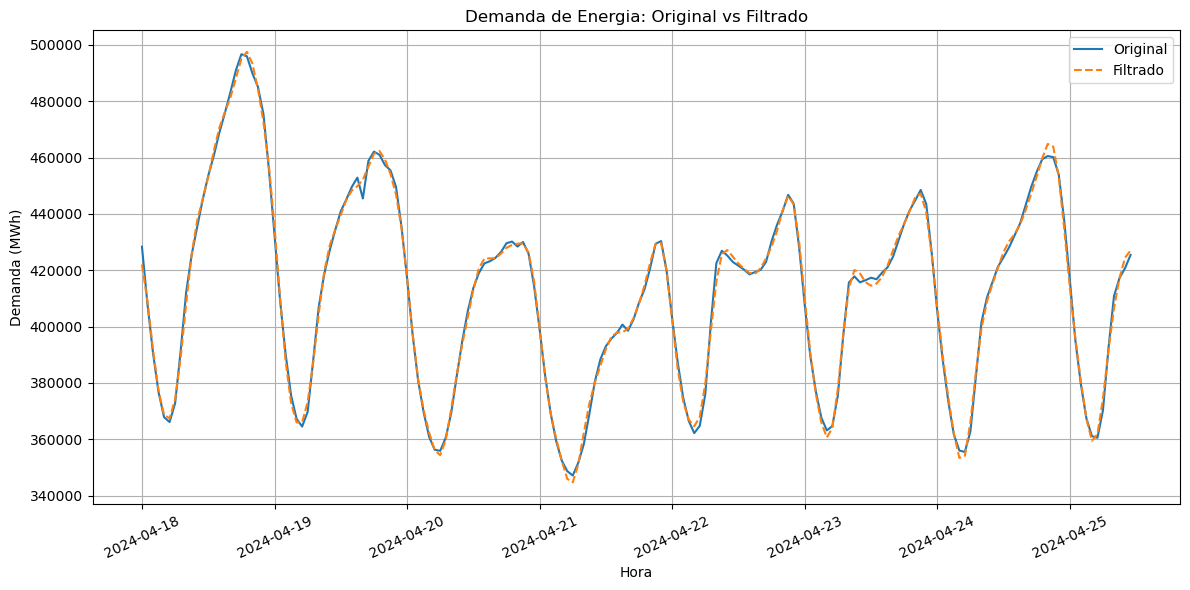

In [85]:
# Reconstrução do sinal filtrado
demanda_filtrada = irfft(Fr_filtrado)

# Comparando sinal original e filtrado
plt.figure(figsize=(12,6))
plt.plot(df['hora'][:180], demanda, label='Original')
plt.plot(df['hora'][:180], demanda_filtrada, label='Filtrado', linestyle='--')
plt.xlabel('Hora')
plt.ylabel('Demanda (MWh)')
plt.title('Demanda de Energia: Original vs Filtrado')
plt.legend()
plt.grid()
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

<br>

***
<br>

## **Exercício 2**

A ideia deste exercício é filtrar um arquivo de áudio.

<br>

(a) Comece escolhendo um arquivo de áudio em formato .wav e carregue-o abaixo. Já será plotado o gráfico das amplitudes da amostra em função do tempo.


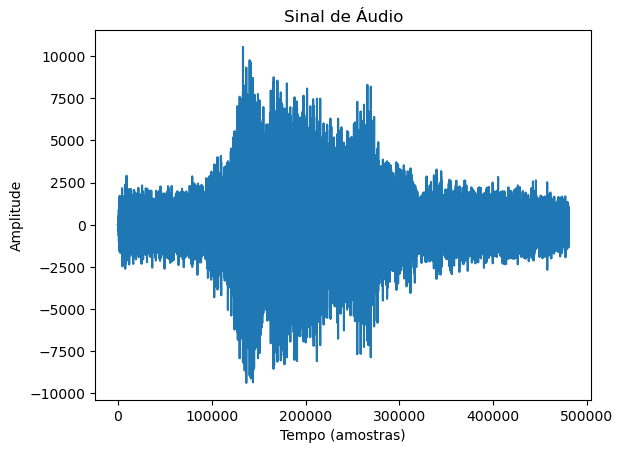

In [4]:
import wave

# faz o upload do arquivo WAV
fn = "city-siren.wav" # áudio tirado de https://pixabay.com/pt/sound-effects/search/ru%C3%ADdo/

'''
uploaded = files.upload()
for fn in uploaded.keys():
  print('Usuário enviou arquivo "{name}" com tamanho {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
'''

# abre o arquivo WAV
with wave.open(fn, 'rb') as wav_file:
    # obtendo os parâmetros de áudio
    num_canais = wav_file.getnchannels()        # número de canais de áudio (mono ou estéreo)
    largura_amostra = wav_file.getsampwidth()   # largura da amostra de áudio em bytes
    taxa_framerate = wav_file.getframerate()    # taxa de framerate do áudio em Hz
    num_quadros = wav_file.getnframes()         # número de quadros de áudio

    dados_audio = wav_file.readframes(num_quadros)  # lê todos os quadros de áudio

    array_audio = np.frombuffer(dados_audio, dtype=np.int16)  # converte os dados para um array de int16

    # plota o sinal de áudio
    plt.plot(array_audio)
    plt.xlabel('Tempo (amostras)')
    plt.ylabel('Amplitude')
    plt.title('Sinal de Áudio')
    plt.show()

In [58]:
from IPython.display import Audio

Audio("city-siren.wav")

<br>

(b) Rode o código abaixo para aplicar a FFT e plotar o gráfico no domínio das frequências.

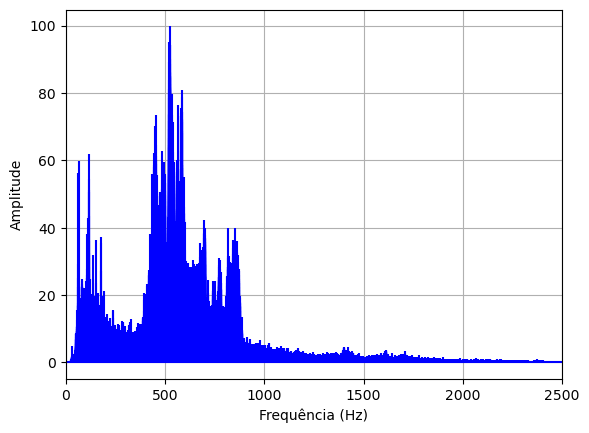

In [5]:
from numpy.fft import rfft, rfftfreq

# aplicando a Transformada Rápida de Fourier
Fq = rfft(array_audio)
P = len(array_audio)  # obtém o tamanho do array de áudio

ampq = np.abs(Fq / (P / 2))  # calcula a amplitude normalizada
freqq = rfftfreq(P, 1.0 / taxa_framerate)  # calcula as frequências correspondentes

# plotando o espectro de frequências
plt.stem(freqq, ampq, 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 2500)  # definindo o limite de frequência (0 a 2500 Hz)
plt.grid()
plt.show()

<br>

(c) Filtre o sinal.

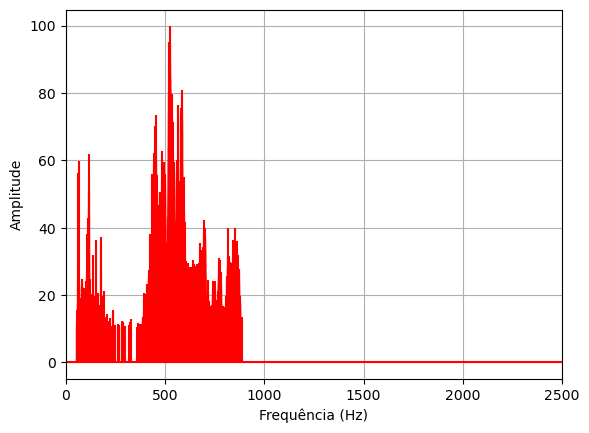

In [6]:
limiar = 10.0
amps_idxs = ampq < limiar

Fq_filtrado = np.copy(Fq)
Fq_filtrado[amps_idxs] = 0
amps = np.abs(Fq_filtrado / (P / 2))

fig, ax = plt.subplots()
ax.stem(freqq, amps, 'r', markerfmt=" ", basefmt="-r")
ax.set_xlabel('Frequência (Hz)')
ax.set_ylabel('Amplitude')
plt.xlim(0, 2500)  # Define o limite de frequência (0 a 2500 Hz)
ax.grid()

<br>

(d) Retorne para o domínio do tempo e compare os gráficos do sinal original e do sinal filtrado.

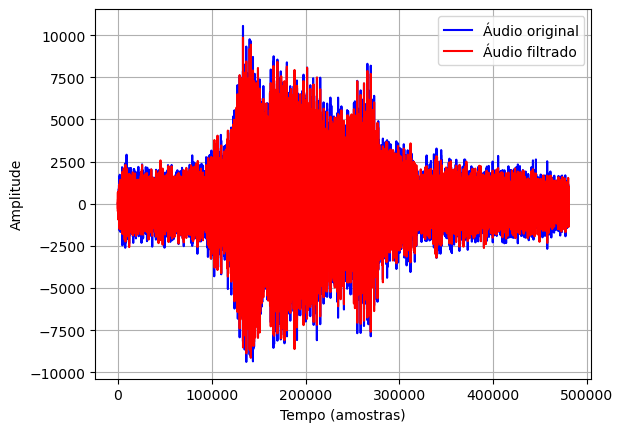

In [9]:
sinal_filtrado = np.fft.irfft(Fq_filtrado)

# Plota a amplitude ao longo do tempo para os sinais original e filtrado
plt.plot(array_audio, 'b', label='Áudio original')
plt.plot(sinal_filtrado, 'r', label='Áudio filtrado')
plt.ylabel('Amplitude')
plt.xlabel('Tempo (amostras)')
plt.grid()
plt.legend()
plt.show()

<br>

(e) Rode o código abaixo para produzir e tocar o áudio correnpondente ao sinal filtrado.

In [12]:
from IPython.display import Audio

# reproduz o sinal de áudio filtrado
audio = Audio(sinal_filtrado.astype(np.int16), rate=taxa_framerate)  # Cria um objeto de áudio com o sinal filtrado e a taxa de amostragem (multiplicar por 2x para o tempo ficar correto)
display(audio)